**Group Members**
*   Ismail
*   Zarif
*   Kartina
*   Nur Fatini


# **Business Understanding**

Objective

The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer purchase behaviour against different products.

Data Overview

Dataset has 537577 rows (transactions) and 12 columns (features) as described below:

User_ID: Unique ID of the user. There are a total of 5891 users in the dataset.

Product_ID: Unique ID of the product. There are a total of 3623 products in the dataset.

Gender: indicates the gender of the person making the transaction.

Age: indicates the age group of the person making the transaction.

Occupation: shows the occupation of the user, already labeled with numbers 0 to 20.

City_Category: User's living city category. Cities are categorized into 3 different categories 'A', 'B' and 'C'.

Stay_In_Current_City_Years: Indicates how long the users has lived in this city.

Marital_Status: is 0 if the user is not married and 1 otherwise.

Product_Category_1 to _3: Category of the product. All 3 are already labaled with numbers.

Purchase: Purchase amount.

# **Data Understanding**

### **Importing Library**

In [3]:
# manipulation data
import pandas as pd
import numpy as np

#visualiation data
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

#Split data for train and test
from sklearn.model_selection import train_test_split

#default theme
plt.style.use('ggplot')
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [ ]:
# !pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 15.3 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=59f3b5f14c9371e059d98c18dd04816f5085e18505e356f1537830f6682d4aa7
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


## **Importing Data**

In [4]:
from google.colab import files
upload = files.upload()

Saving train.csv to train.csv


In [5]:
df = pd.read_csv('train.csv')
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [6]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  550068
Columns  :  12

Features : 
 ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']

Missing values :   556885

Unique values :  
 User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64


In [ ]:
### check data types
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [ ]:
#Create a new function:
def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print ("Missing values per column:")
print (df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

Missing values per column:
User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


In [ ]:
#Create a new function to obtain percentage of missing values by column:
def num_missing(x):
  return sum(x.isnull())/df.shape[0]*100

#View percentage of missing values by column:
print ("Missing values per column:")
print (df.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

Missing values per column:
User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64


In [ ]:
### First and Second Moment Business Decision ###

# Measures of central tendancies for all columns - only focus for numeric columns
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
# Measures of central tendancies for all columns - only focus for string columns
df.describe(include = ['object'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [ ]:
### View value for columns have missing value

print(df["Product_Category_2"].unique())
print(df["Product_Category_3"].unique())

[nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
[nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


**Data Visualisation**



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1937334f70>,
      dtype=object)

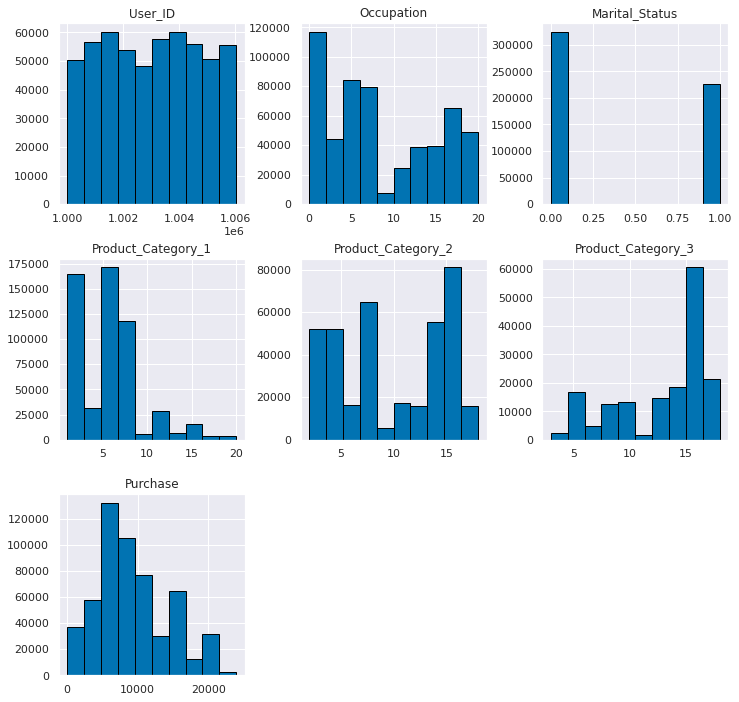

In [ ]:
df.hist(edgecolor='black',figsize=(12,12))

Data Visualization by Attribute

a) Gender


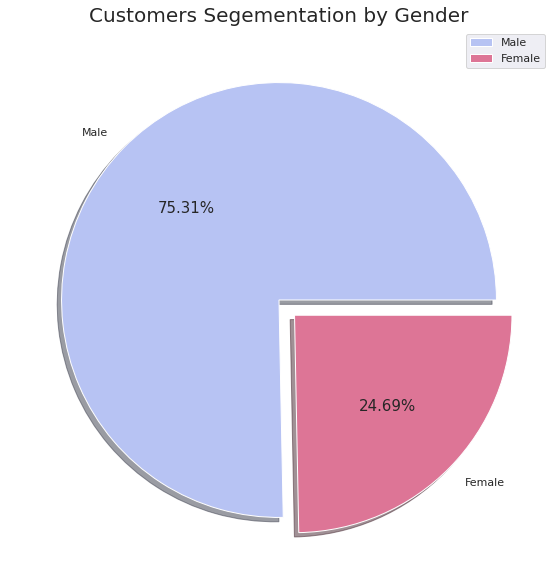

In [ ]:
# pie chart 

size = df['Gender'].value_counts()
labels = ['Male', 'Female']
colors = ['#B7C3F3','#DD7596']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Customers Segementation by Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

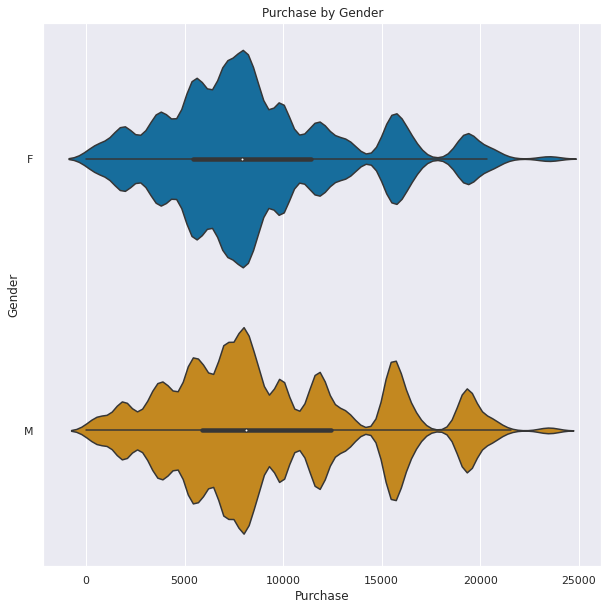

In [ ]:
import pandas as pd
import seaborn as sns
sns.violinplot(x=df["Purchase"], y= df["Gender"])
plt.title('Purchase by Gender');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



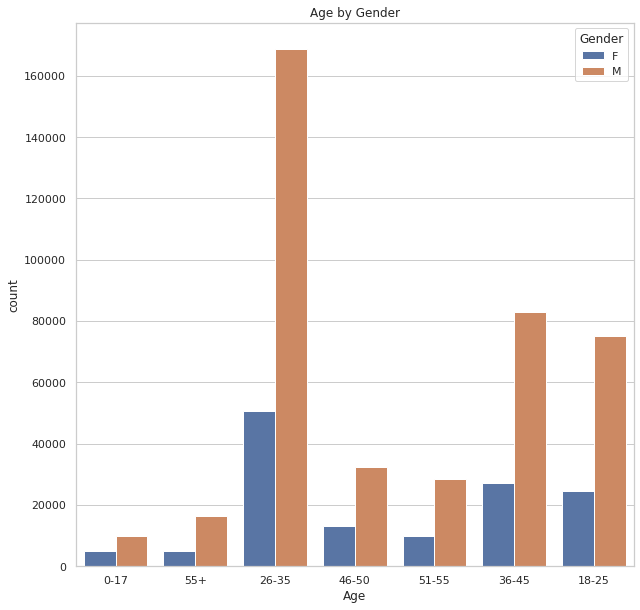

In [ ]:

sns.set_theme(style="whitegrid")
sns.countplot(df['Age'],hue=df['Gender'])
plt.title('Age by Gender');

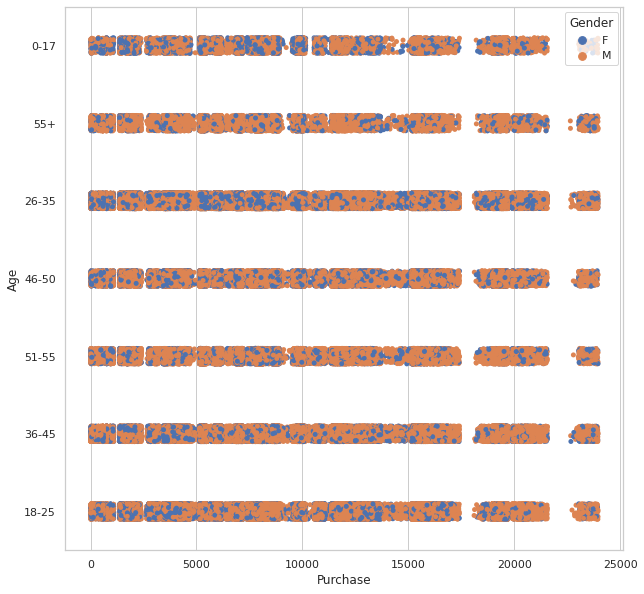

In [ ]:
sns.stripplot(data=df, x="Purchase", y="Age", hue="Gender",palette="deep")

In [ ]:
df['combined_G_M'] = df.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(df['combined_G_M'].unique())

['F_0' 'M_0' 'M_1' 'F_1']


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



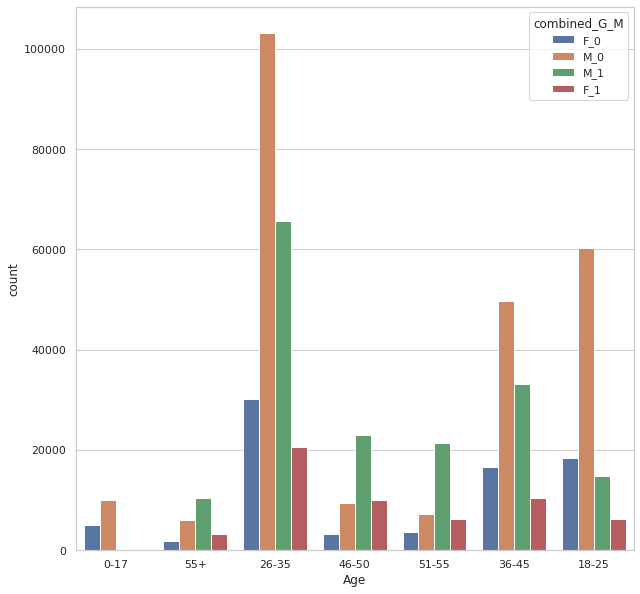

In [ ]:
sns.countplot(df['Age'],hue=df['combined_G_M'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



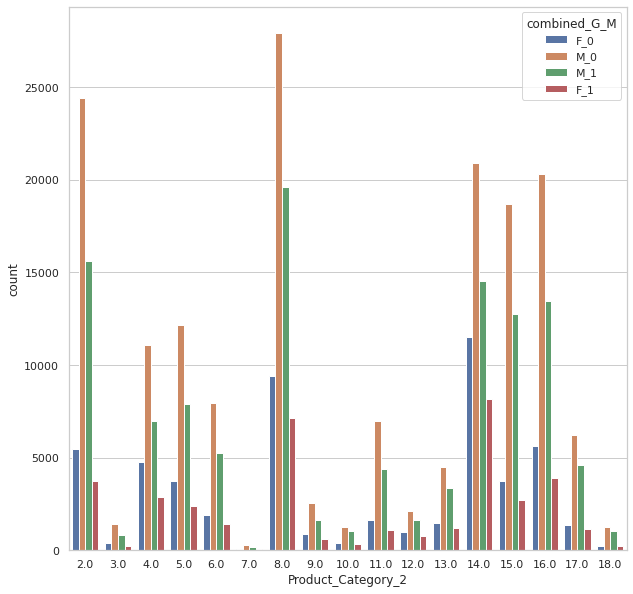

In [ ]:
sns.countplot(df['Product_Category_2'],hue=df['combined_G_M'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



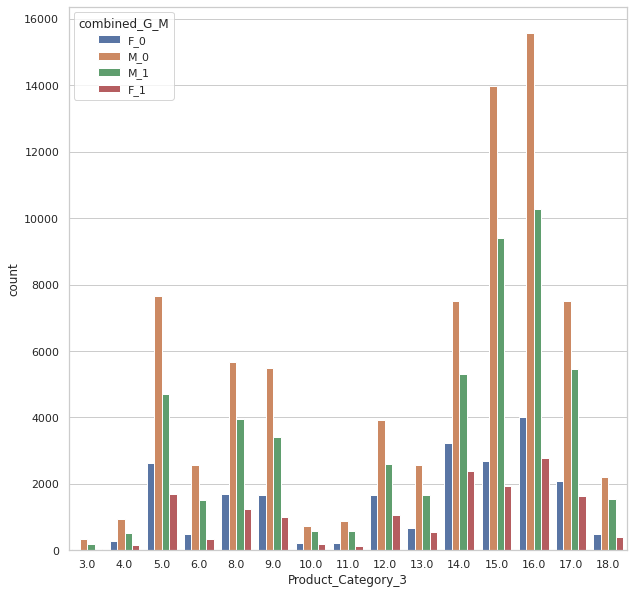

In [ ]:

sns.countplot(df['Product_Category_3'],hue=df['combined_G_M'])

B) Age

In [ ]:
ageData = sorted(list(zip(df.Age.value_counts().index, df.Age.value_counts().values)))
age, productBuy = zip(*ageData)
age, productBuy = list(age), list(productBuy)
ageSeries = pd.Series((i for i in age))

data = [go.Bar(x=age, 
               y=productBuy, 
               name="Amount of Sold Product",
               marker = dict(color=['white', 'coral', 'plum', 'navy', 'crimson', 'royalblue', 'teal'],
                            line = dict(color='#7C7C7C', width = .5)),
              text="Age: " + ageSeries)]
layout = go.Layout(title= "Amount of Sold Product according to Age Group")
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
df.Age.value_counts().index

Index(['26-35', '36-45', '18-25', '46-50', '51-55', '55+', '0-17'], dtype='object')

In [ ]:
df.Age.value_counts().values

array([219587, 110013,  99660,  45701,  38501,  21504,  15102])

In [ ]:
list(zip(df.Age.value_counts().index, df.Age.value_counts().values))

[('26-35', 219587),
 ('36-45', 110013),
 ('18-25', 99660),
 ('46-50', 45701),
 ('51-55', 38501),
 ('55+', 21504),
 ('0-17', 15102)]

In [ ]:
sorted(list(zip(df.Age.value_counts().index, df.Age.value_counts().values)))

[('0-17', 15102),
 ('18-25', 99660),
 ('26-35', 219587),
 ('36-45', 110013),
 ('46-50', 45701),
 ('51-55', 38501),
 ('55+', 21504)]

C) Product

     Product_Category  Total Amount Sold
0  Product_Category_1             550068
1  Product_Category_2             376430
2  Product_Category_3             166821


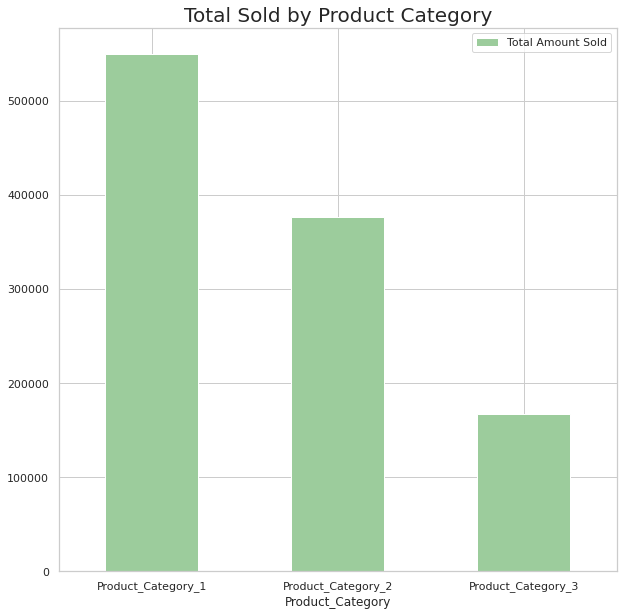

In [ ]:

# Products Sold
product={
    'Product_Category':['Product_Category_1','Product_Category_2','Product_Category_3'],
    'Total Amount Sold':[df.Product_Category_1.value_counts().sum(),df.Product_Category_2.value_counts().sum(),df.Product_Category_3.value_counts().sum()]
        }
product_df=pd.DataFrame(product)
print(product_df)

product_df.plot.bar(x='Product_Category',y='Total Amount Sold',color='#9CCC9C',rot=0)
plt.title('Total Sold by Product Category', fontsize = 20)
plt.show()

D) City


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



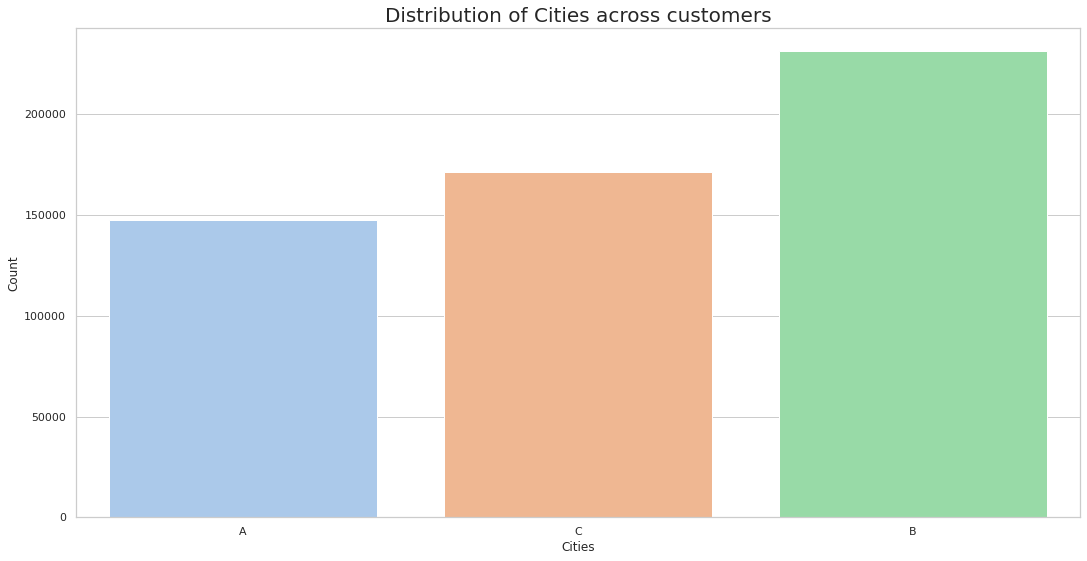

In [ ]:
###City
palette=sns.set_palette("pastel")
plt.rcParams['figure.figsize'] = (18, 9)
sns.countplot(df['City_Category'], palette = palette)
plt.title('Distribution of Cities across customers', fontsize = 20)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.show()

E) Customer's Occupation


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



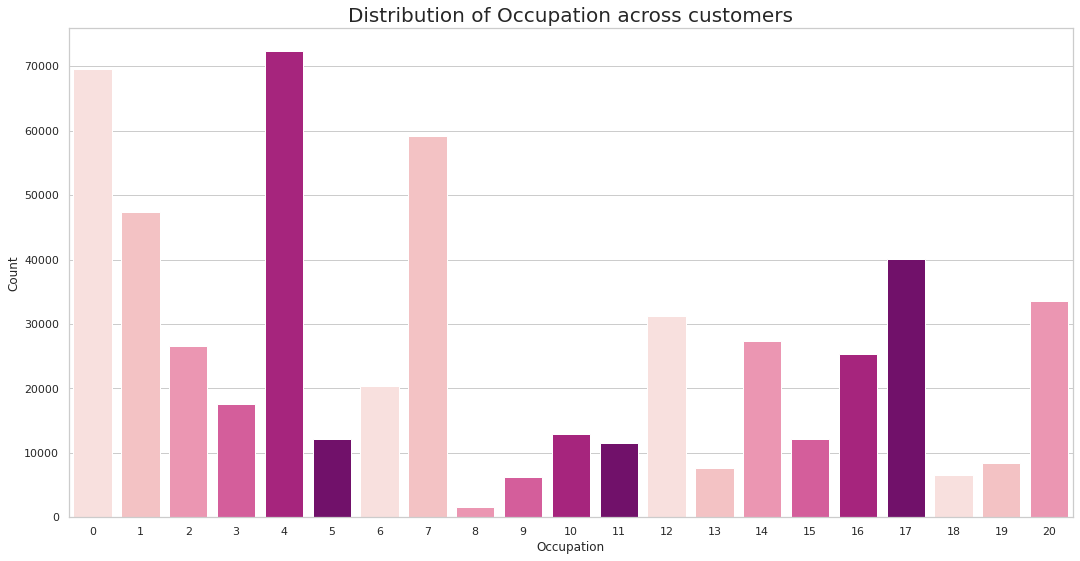

In [ ]:
##Distribution of Customers by Occupation
palette=sns.color_palette("RdPu")

plt.rcParams['figure.figsize'] = (18, 9)
sns.countplot(df['Occupation'], palette = palette)
plt.title('Distribution of Occupation across customers', fontsize = 20)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

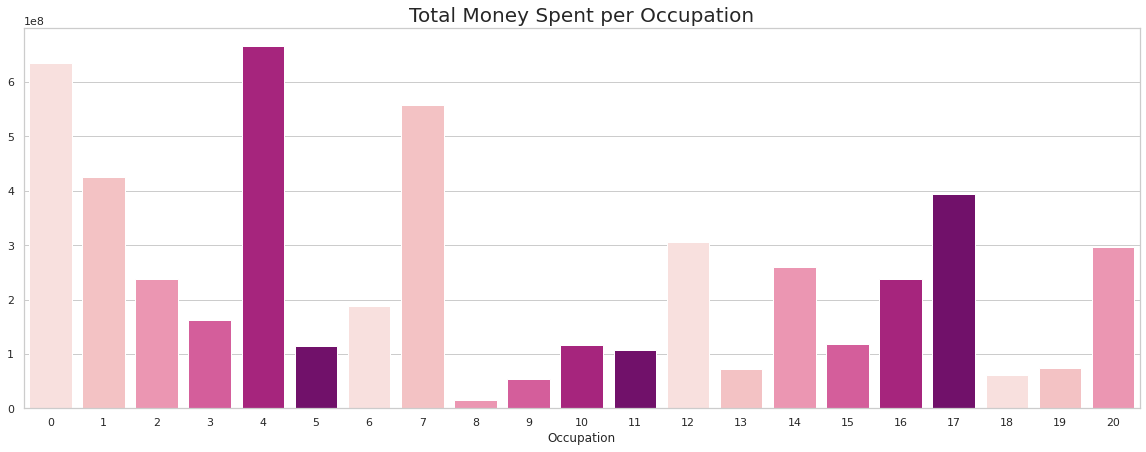

In [ ]:
### Purchase amount by Occupation
palette=sns.color_palette("RdPu")
spent_by_occ = df.groupby(by='Occupation').sum()['Purchase']
plt.figure(figsize=(20, 7))

sns.barplot(x=spent_by_occ.index,y=spent_by_occ.values,palette=palette)
plt.title('Total Money Spent per Occupation',fontsize = 20)
plt.show()

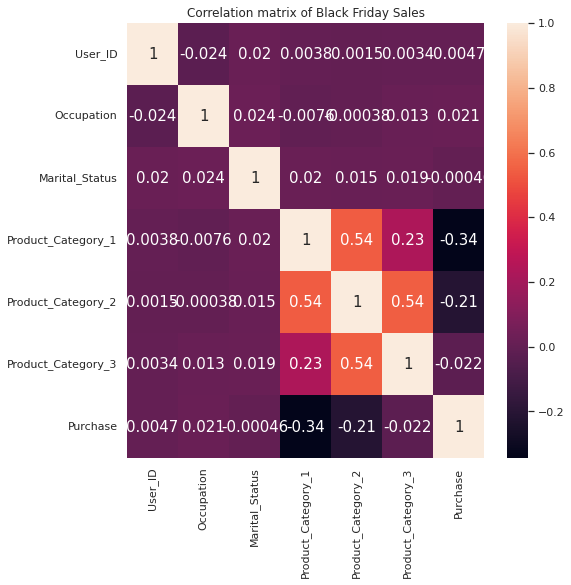

In [ ]:
# Plotting a heatmap to calculate correlation between the inputs and the outputs

finaldata_hm = sns.heatmap(df.corr(), annot = True)
finaldata_hm.set(title = 'Correlation matrix of Black Friday Sales')
sns.set(rc={"figure.figsize":(20,30)})
plt.show()

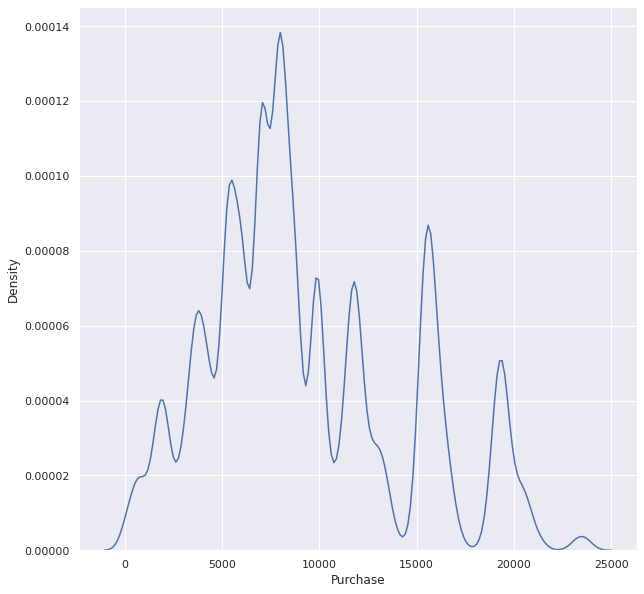

In [ ]:
plt.figure(figsize=(10, 10))
sns.kdeplot(x='Purchase', data = df)

In [ ]:
### Third and Fourth Moment Business Decision ###

# Skew and Kurtosis
import scipy.stats as stats

stats.mode(df['Occupation'])
print('Occupation  (skew) = ', df['Occupation'].skew())
print('Occupation  (kurtosis) = ', df['Occupation'].kurt())
print('')
stats.mode(df.Purchase)
print('Purchase (skew) = ', df.Purchase.skew())
print('Purchase (kurtosis) = ', df.Purchase.kurt())


Occupation  (skew) =  0.40014010986184784
Occupation  (kurtosis) =  -1.21611364874086

Purchase (skew) =  0.6001400037087128
Purchase (kurtosis) =  -0.3383775655851702


# Data Preparation

# Data Cleaning
After exploring the data, necessary steps need to be taken before building the models. The exploration showed that some of the features contain (> 25%) missing values in the feature.some of the feature containing value that is unique in each row. Hence, this feature need to be removed. Moreover other cleaning steps such as outlier and redundancy need to be addressed as well.

## Handling missing values

In [7]:
clean_df = df.copy()

clean_df['Product_Category_2'] = clean_df['Product_Category_2'].fillna(clean_df['Product_Category_2'].max()) 
clean_df['Product_Category_3'] = clean_df['Product_Category_3'].fillna(clean_df['Product_Category_3'].max()) 

clean_df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

## Identify and Removing duplicate record

In [8]:
clean_df[clean_df.duplicated()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


## Outlier

Text(0.5, 1.0, 'Distribution of Purchase columns')

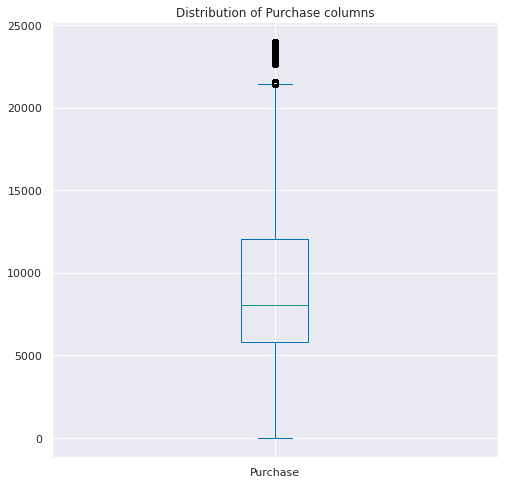

In [9]:
clean_df.Purchase.plot(kind = 'box')
plt.title('Distribution of Purchase columns')

In [10]:
# retrieve and sort the puchase columns
purchase = np.sort(clean_df.Purchase)

#calculate the q1 and q3 quartile
q1 = np.percentile(purchase, 25, interpolation = 'midpoint')
q3 = np.percentile(purchase, 75, interpolation = 'midpoint')

#calculate the interquartile range
IQR = q3 - q1

#print out the value
print('the 25th percentile is: ' + str(q1))
print('the 75th percentile is: ' + str(q3))
print('the interquartile range is: ' + str(IQR))

the 25th percentile is: 5823.0
the 75th percentile is: 12054.0
the interquartile range is: 6231.0


In [11]:
#calculate the lower limit
lower = q1 - 1.5*IQR
#calculate the upper limit
upper = q3 + 1.5*IQR

#print the boundaries
print('lower limit is ' + str(lower))
print('upper limit is ' + str(upper))

lower limit is -3523.5
upper limit is 21400.5


In [12]:
#retrieving the outlier
outlier = []

for i in purchase:
  if (i < lower) | (i > upper):
    outlier.append(i)

len(outlier)
  

2677

Based on IQR, there are 2677 value of purchase outlier in the data set. Hence, the rows that contains those value will be removed. After removing the outlier, the dataset contains 547391 rows.

In [13]:
no_outlier = clean_df[~clean_df.Purchase.isin(outlier)]
no_outlier.shape

(547391, 12)

## Removing ID features and unnecessary columns
The ID features do not give benefit as the value contain in each row is unique. Hence, it is better to remove it. other redundant columns also be removed


In [14]:
clean_df = no_outlier.drop(['User_ID', 'Product_ID'], axis = 1)

In [15]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 547391 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      547391 non-null  object 
 1   Age                         547391 non-null  object 
 2   Occupation                  547391 non-null  int64  
 3   City_Category               547391 non-null  object 
 4   Stay_In_Current_City_Years  547391 non-null  object 
 5   Marital_Status              547391 non-null  int64  
 6   Product_Category_1          547391 non-null  int64  
 7   Product_Category_2          547391 non-null  float64
 8   Product_Category_3          547391 non-null  float64
 9   Purchase                    547391 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 45.9+ MB


In [ ]:
# clean_df.drop('combined_G_M', axis = 1, inplace = True)

In [16]:
#Before
clean_df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,18.0,18.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,18.0,18.0,1422
3,F,0-17,10,A,2,0,12,14.0,18.0,1057
4,M,55+,16,C,4+,0,8,18.0,18.0,7969


In [17]:
#one-hot label encoder

#change the string into numeric 
GenderNum = pd.Categorical(clean_df['Gender']).codes
AgeNum = pd.Categorical(clean_df['Age']).codes
CityCategoryNum = pd.Categorical(clean_df['City_Category']).codes
StayCurrentCityNum = pd.Categorical(clean_df['Stay_In_Current_City_Years']).codes

#add the col into the table
clean_df['Gender'] = GenderNum
clean_df['Age'] = AgeNum
clean_df['City_Category'] = CityCategoryNum
clean_df['Stay_In_Current_City_Years'] = StayCurrentCityNum

In [18]:
#after
clean_df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,18.0,18.0,8370
1,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,0,10,0,2,0,12,18.0,18.0,1422
3,0,0,10,0,2,0,12,14.0,18.0,1057
4,1,6,16,2,4,0,8,18.0,18.0,7969


**Model Building**

For model building we will use 2 approaches for experiment: 
1. using the splitting criteria
2. using cross validation score
------------------------------------------------------------------------
1. Spliting data - 
    The data set will be split into training and testing sets. The training set will be used to train the model and testing set will be used to test the model. The data spliting is based on percentage. The training set is 80% of the data set ewhile testing set is 20% of the data set.

2. Model Selection - Regression use case

  1. Lasso Regression
  4. Random Forest Regressor
  6. Gradient Boosting Regressor
  7. XGBoost Regressor
  8. AdaBoost Regressor

Performance Evaluation:
The model built will be evaluated according to 2 evaluations for two use case. The first use case is without standard scaler, while the second use case is with standard scaler.


1.   Root Mean Squared Error (RMSE)
2.   Mean Absolute Error (MAE)
3.   R-Squared (R2)


**CASE 1: USING SPLITTING CRITERIA - 80% TRAINING 20% TEST**

**1. Without Standard Scaler**

In [22]:
#import prediction model library
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor)
from xgboost.sklearn import XGBRegressor

##Feature scale
from sklearn.preprocessing import StandardScaler

In [23]:
#split the x variable and y variable into test set (30%) and train set (70%)
nwData = clean_df.copy()
X = nwData.drop(['Purchase'],axis=1)
y = nwData.loc[:,['Purchase']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)


Lasso regression Model

In [24]:
##Lasso Regression Model
lasso=Lasso(alpha=1.0)
lasso.fit(X_train,y_train)
y_lasso_pred=lasso.predict(X_test)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_lasso_pred)))
print("MAE:",metrics.mean_absolute_error(y_test, y_lasso_pred))
print("R2 Score:",round(metrics.r2_score(y_test,y_lasso_pred)*100,2))

RMSE: 4519.80843338601
MAE: 20428668.274507295
R2 Score: 16.09


Random Forest Regressor

In [25]:
rf = RandomForestRegressor(random_state = 0)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred_rf))
print("R2 Score:",round(metrics.r2_score(y_test,y_pred_rf)*100,2))

<ipython-input-25-f562a7574675>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RMSE: 3024.086542214813
MAE: 9145099.414804745
R2 Score: 62.44


Gradient Boosting

In [26]:
gb = GradientBoostingRegressor(random_state = 0)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb)))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred_gb))
print("R2 Score:",round(metrics.r2_score(y_test,y_pred_gb)*100,2))

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



RMSE: 2949.5115069658264
MAE: 8699618.129723819
R2 Score: 64.27


XGBoost

In [27]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.2, max_depth=8)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb)))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred_xgb))
print("R2 Score:",round(metrics.r2_score(y_test,y_pred_xgb)*100,2))

[13:44:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 2829.3858087497547
MAE: 8005424.054754502
R2 Score: 67.12


ADABoost

In [28]:
adaboost = AdaBoostRegressor(random_state = 0)
adaboost.fit(X_train, y_train)
y_pred_ada = adaboost.predict(X_test)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada)))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred_ada))
print("R2 Score:",round(metrics.r2_score(y_test,y_pred_ada)*100,2))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



RMSE: 3492.0503107979885
MAE: 12194415.373144327
R2 Score: 49.91


## 2. with applying Standard Scaler

In [29]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
x_train_scaled = pd.DataFrame(scaler.transform(X_train),
                              columns = X_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(X_test),
                             columns = X_test.columns)
x_train_scaled.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0.573638,-0.365358,0.448506,-0.056902,1.660211,-0.833368,-0.097107,-0.777470,0.484329
1,-1.743261,2.588331,-0.164963,-0.056902,-0.665616,1.199950,0.666962,0.985751,0.484329
2,0.573638,1.849909,-1.085165,1.258095,0.109660,-0.833368,1.431032,0.456784,0.484329
3,0.573638,0.373064,1.368708,1.258095,-0.665616,1.199950,0.666962,0.633106,0.484329
4,0.573638,-1.103780,0.601873,-0.056902,0.884935,1.199950,-0.097107,0.280462,0.185443


## Lasso 

In [30]:
#Lasso
lasso.fit(x_train_scaled,y_train)
y_pred_scaled_ls = lasso.predict(x_test_scaled)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_scaled_ls)))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred_scaled_ls))
print("R2 Score:",round(metrics.r2_score(y_test,y_pred_scaled_ls)*100,2))

RMSE: 4519.803331474266
MAE: 20428622.155205876
R2 Score: 16.09


## Random Forest

In [31]:
#RF
rf.fit(x_train_scaled, y_train)
y_pred_scaled_rf = rf.predict(x_test_scaled)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_scaled_rf)))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred_scaled_rf))
print("R2 Score:",round(metrics.r2_score(y_test,y_pred_scaled_rf)*100,2))

<ipython-input-31-703993bad221>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RMSE: 3023.959887855997
MAE: 9144333.403362053
R2 Score: 62.44


## Gradient Boosting

In [32]:
gb.fit(x_train_scaled, y_train)
y_pred_gb_scaled = gb.predict(x_test_scaled)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb_scaled)))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred_gb_scaled))
print("R2 Score:",round(metrics.r2_score(y_test,y_pred_gb_scaled)*100,2))

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



RMSE: 2949.5115069658264
MAE: 8699618.129723819
R2 Score: 64.27


XGBoost

In [33]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.2, max_depth=8)
xgb.fit(x_train_scaled, y_train)
y_pred_xgb_scaled = xgb.predict(x_test_scaled)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb_scaled)))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred_xgb_scaled))
print("R2 Score:",round(metrics.r2_score(y_test,y_pred_xgb_scaled)*100,2))

[13:49:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 2829.402978065871
MAE: 8005521.21228802
R2 Score: 67.12


## Ada Boost

In [34]:
adaboost.fit(x_train_scaled, y_train)
y_pred_ada_scaled = adaboost.predict(x_test_scaled)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada_scaled)))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred_ada_scaled))
print("R2 Score:",round(metrics.r2_score(y_test,y_pred_ada_scaled)*100,2))


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



RMSE: 3492.0503107979885
MAE: 12194415.373144327
R2 Score: 49.91


**CASE 2: Using Cross Validation score Library**

**1. Without applying Standard Scaler**

In [19]:
#We will save the model performance metrics in a DataFrame
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
Model = []
RMSE = []
MAE = []
R_sq = []

#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, X, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, X, y, cv=5, 
                                               scoring='neg_mean_squared_error').mean()))
    MAE.append(((-1) * cross_val_score(model, X, y, cv=5, 
                                               scoring='neg_mean_absolute_error').mean()))
    R_sq.append(cross_val_score(model, X, y, cv=5, scoring='r2').mean())

In [20]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)
from xgboost.sklearn import XGBRegressor

names = [ 'Lasso Regression', 
         'Random Forest Regressor', 'Gradient Boosting Regressor','XGBoost Regressor',
         'Adaboost Regressor']
models = [ Lasso(random_state=0),RandomForestRegressor(random_state=0), GradientBoostingRegressor(random_state=0), 
          XGBRegressor(n_estimators=100, learning_rate=0.2, max_depth=8),AdaBoostRegressor(random_state=0)]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.8/dist-packages/s

[00:41:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:42:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:44:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:45:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:47:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:48:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:49:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConv

In [21]:
evaluation = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                           'MAE':MAE,
                           'R Squared': R_sq})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE,MAE,R Squared
0,Lasso Regression,4530.400103,3470.725390,0.156869
1,Random Forest Regressor,3041.916184,2228.828889,0.619935
2,Gradient Boosting Regressor,2976.755041,2271.237014,0.636089
3,XGBoost Regressor,2852.471870,2136.976641,0.665840
4,Adaboost Regressor,3428.011275,2678.994874,0.517591


**2. With applying standard scaler**

In [22]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
# x_train_scaled = pd.DataFrame(scaler.transform(X_train),
#                               columns = X_train.columns)
x_scaled = pd.DataFrame(scaler.transform(X),
                              columns = X.columns)
x_scaled.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,-1.745896,-1.844212,0.295231,-1.371308,0.109757,-0.832731,-0.605733,0.986219,0.484560
1,-1.745896,-1.844212,0.295231,-1.371308,0.109757,-0.832731,-1.114979,-1.128836,-0.709997
2,-1.745896,-1.844212,0.295231,-1.371308,0.109757,-0.832731,1.685871,0.986219,0.484560
3,-1.745896,-1.844212,0.295231,-1.371308,0.109757,-0.832731,1.685871,0.281200,0.484560
4,0.572772,2.591425,1.215254,1.259771,1.660822,-0.832731,0.667380,0.986219,0.484560


In [38]:
#We will save the model performance metrics in a DataFrame
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
Model = []
RMSE = []
MAE = []
R_sq = []

#Creating a Function to append the cross validation scores of the algorithms
def input_scores(name, model, X, y):
    Model.append(name)
    RMSE.append(np.sqrt((-1) * cross_val_score(model, X, y, cv=5, 
                                               scoring='neg_mean_squared_error').mean()))
    MAE.append(((-1) * cross_val_score(model, X, y, cv=5, 
                                               scoring='neg_mean_absolute_error').mean()))
    R_sq.append(cross_val_score(model, X, y, cv=5, scoring='r2').mean())

In [39]:
from sklearn.linear_model import Lasso
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              AdaBoostRegressor)
from xgboost.sklearn import XGBRegressor
names = ['Lasso Regression',
         'Random Forest Regressor', 'Gradient Boosting Regressor','XGBoost Regressor',
         'Adaboost Regressor']
models = [ Lasso(random_state=0),RandomForestRegressor(random_state=0), GradientBoostingRegressor(random_state=0), 
          XGBRegressor(n_estimators=100, learning_rate=0.2, max_depth=8),AdaBoostRegressor(random_state=0)]

#Running all algorithms
for name, model in zip(names, models):
    input_scores(name, model, x_scaled, y)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.8/dist-packages/s

[08:23:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:24:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:25:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:26:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:27:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:29:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:30:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:31:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConv

In [40]:
evaluation2 = pd.DataFrame({'Model': Model,
                           'RMSE': RMSE,
                            'MAE':MAE,
                           'R Squared': R_sq})
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation2

FOLLOWING ARE THE TRAINING SCORES: 


,Model,RMSE,MAE,R Squared
0,Lasso Regression,4530.403921,3470.848827,0.156868
1,Random Forest Regressor,3041.844455,2228.727761,0.619951
2,Gradient Boosting Regressor,2976.755041,2271.237014,0.636089
3,XGBoost Regressor,2852.455327,2136.974404,0.665844
4,Adaboost Regressor,3428.011275,2678.994874,0.517591


Conclusion:
Based on above cross validation score, we can conclude there is not much changes for the score so choosing for choosing best model we will choose with applying standard scaler

**Hypertuning Model for best prediction model**

In [35]:
### Hypertuning the best model.
#tuning for number of trees
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'n_estimators':[30,480,1000],#range(20,500),
              'max_depth':[5,8],#range(5,16), 
              # 'booster': ['gbtree','gblinear'],
              # 'min_samples_split':range(200,1001,200), 
              'learning_rate':[0.1,0.2],
              'subsample':[0.6,0.95]}
clf = RandomizedSearchCV(estimator = XGBRegressor(n_estimators=100, learning_rate=0.2, max_depth=8), 
                   param_distributions = param_grid,verbose=10, cv=5, n_iter=5, scoring='r2',return_train_score = True,
            random_state=42).fit(X_train, y_train)
print(clf.best_estimator_) 
print("R Squared:",clf.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5; 1/5] START learning_rate=0.1, max_depth=8, n_estimators=480, subsample=0.6
[05:38:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/5; 1/5] END learning_rate=0.1, max_depth=8, n_estimators=480, subsample=0.6;, score=(train=0.708, test=0.660) total time= 4.9min
[CV 2/5; 1/5] START learning_rate=0.1, max_depth=8, n_estimators=480, subsample=0.6
[05:43:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/5; 1/5] END learning_rate=0.1, max_depth=8, n_estimators=480, subsample=0.6;, score=(train=0.708, test=0.659) total time= 4.9min
[CV 3/5; 1/5] START learning_rate=0.1, max_depth=8, n_estimators=480, subsample=0.6
[05:48:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/5; 1/5] END learning_rate=0.1, 

In [36]:
print(clf.best_estimator_) 

XGBRegressor(max_depth=8, n_estimators=480, subsample=0.6)


In [38]:
xgb_reg=XGBRegressor(n_estimators=480, learning_rate=0.2, max_depth=8)
xgb_reg.fit(x_train_scaled,y_train)
xgb_y_pred_scaled=xgb_reg.predict(x_test_scaled)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, xgb_y_pred_scaled)))
print("MAE:",metrics.mean_absolute_error(y_test, xgb_y_pred_scaled))
print("R2 Score:",round(metrics.r2_score(y_test,xgb_y_pred_scaled)*100,2))

[14:07:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 2841.7778480997754
MAE: 2107.969109628862
R2 Score: 66.83


Conclusion:

After tuning the best model, we observe the tuning parameter not show better in RMSE and R2 score. So we remain choose model without hypertuning model

In [40]:
#Feature Importance

fi=pd.DataFrame(xgb_reg.feature_importances_,index=X.columns, columns=['score'])
fi.sort_values(by='score', ascending=False)

,score
Product_Category_1,0.873735
Product_Category_2,0.022951
Product_Category_3,0.020713
City_Category,0.017904
Age,0.013768
Stay_In_Current_City_Years,0.013164
Gender,0.013152
Marital_Status,0.012672
Occupation,0.011940


**Model Testing**

In [42]:
xgb_y_pred_scaled

array([14854.283 , 14242.099 ,  7698.7505, ...,  7570.422 ,  6172.4985,
        6637.397 ], dtype=float32)

In [44]:
actual = y_test.to_numpy()
actual

array([[19143],
       [15783],
       [ 4005],
       ...,
       [ 9848],
       [ 7101],
       [ 7045]])

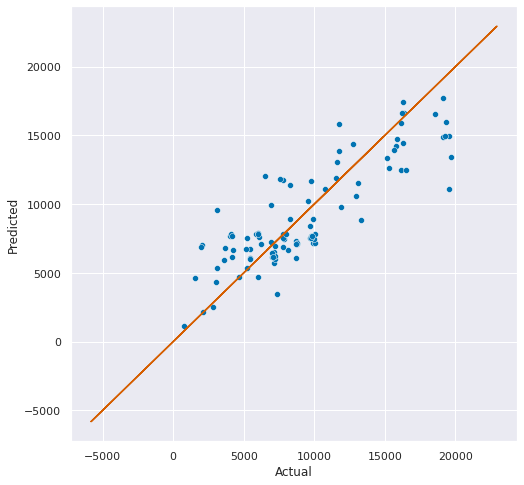

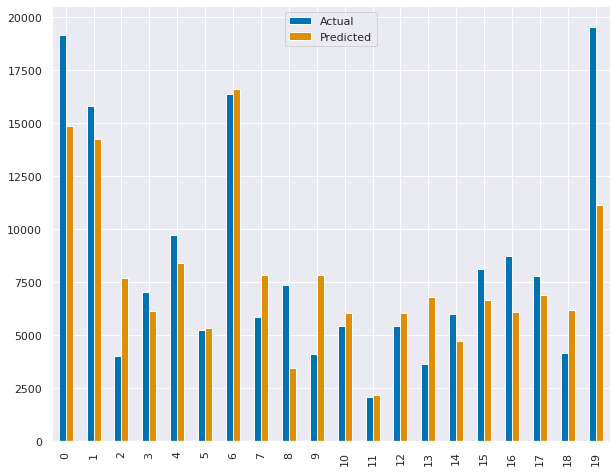

In [46]:
final_pred=pd.DataFrame({'Actual':actual.flatten(),'Predicted':xgb_y_pred_scaled})
sns.scatterplot(data=final_pred.head(100), x='Actual',y='Predicted')
plt.plot(xgb_y_pred_scaled,xgb_y_pred_scaled,'r')
plt.show()
final_pred.head(20).plot(kind='bar',figsize=(10,8))
plt.show()